In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[:1]

array([ [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]], dtype=object)

In [6]:
word_index = reuters.get_word_index()
word_index

{'collectibility': 17356,
 'frostex': 27724,
 'halefolu': 21348,
 'irrigation': 5408,
 'mackes': 27619,
 'redel': 30044,
 'duration': 8982,
 'taxation': 4271,
 'lacking': 10615,
 '488': 4028,
 'chancellor': 2149,
 'customer': 1594,
 'trimmmed': 21109,
 'dietitian': 30117,
 'wolf': 9778,
 'reassess': 11565,
 'ns': 14946,
 "indians'": 28494,
 "third's": 19578,
 "memories'": 27515,
 'raferty': 25661,
 'combining': 5796,
 "montagu's": 27016,
 'contingents': 20880,
 'mauritania': 21739,
 'defined': 3300,
 'coca': 6739,
 'btp': 28934,
 'takes': 2295,
 'datagraphix': 7952,
 'pportfolio': 29966,
 'squeezes': 12126,
 'fervor': 26425,
 'shrink': 9935,
 'slaughterhouse': 11807,
 '223': 3120,
 'optically': 27195,
 'meridian': 7418,
 'shore': 6234,
 'safco': 11454,
 'aetna': 12600,
 'petitioners': 15948,
 'meredith': 13264,
 'lucrative': 8876,
 'fallen': 1906,
 'withheld': 8219,
 'dominican': 5016,
 'pleasantly': 26353,
 'free': 661,
 'vanishes': 30461,
 'nursing': 8909,
 'above': 485,
 'powerine':

In [7]:
word_index['the']

1

In [8]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [10]:
# Encoding the data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros([len(sequences), dimension])
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# Encoding labels

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [12]:
# Model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
# Compiling the model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 0s - loss: 1.4430 - acc: 0.6878 - val_loss: 1.3435 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 0s - loss: 1.0929 - acc: 0.7661 - val_loss: 1.1704 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 0s - loss: 0.8682 - acc: 0.8166 - val_loss: 1.0788 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 0s - loss: 0.7020 - acc: 0.8483 - val_loss: 0.9844 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 0s - loss: 0.5666 - acc: 0.8796 - val_loss: 0.9401 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s - loss: 0.4592 - acc: 0.9039 - val_loss: 0.9090 - val_acc: 0.80100.90
Epoch 8/20
7982/7982 [==============================] - 0s - loss: 0.3704

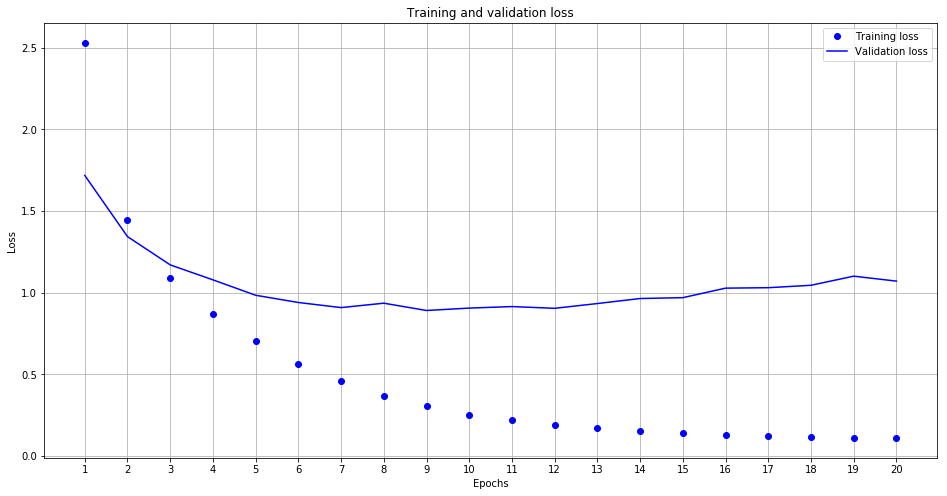

In [25]:
# Plottin ithe training and validation loss

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xticks(epochs)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

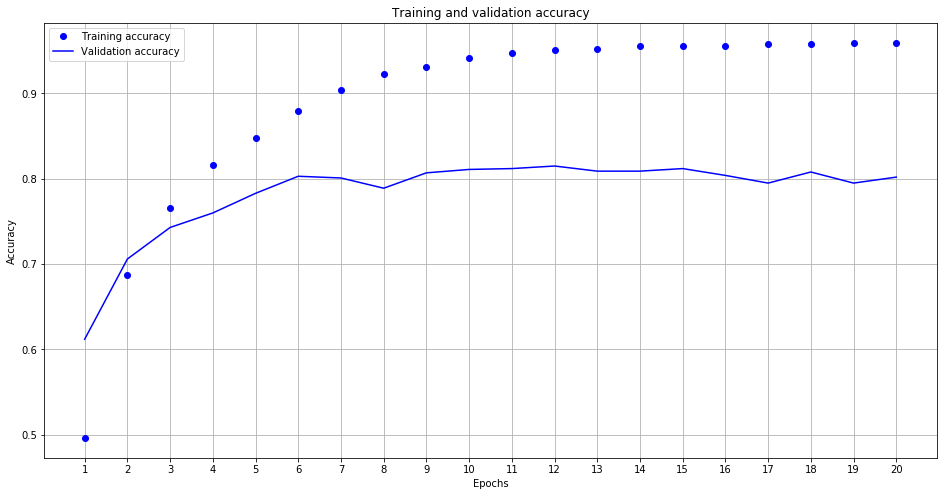

In [29]:
# Plotting the training and validation accuracy

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.grid()

plt.show()


In [15]:
# Retrainining the model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s - loss: 2.6113 - acc: 0.5274 - val_loss: 1.6800 - val_acc: 0.6310
Epoch 2/9
7982/7982 [==============================] - 0s - loss: 1.4003 - acc: 0.7031 - val_loss: 1.2832 - val_acc: 0.7160
Epoch 3/9
7982/7982 [==============================] - 0s - loss: 1.0553 - acc: 0.7681 - val_loss: 1.1179 - val_acc: 0.7550
Epoch 4/9
7982/7982 [==============================] - 0s - loss: 0.8290 - acc: 0.8217 - val_loss: 1.0192 - val_acc: 0.7900
Epoch 5/9
7982/7982 [==============================] - 0s - loss: 0.6637 - acc: 0.8608 - val_loss: 0.9666 - val_acc: 0.7990
Epoch 6/9
7982/7982 [==============================] - 0s - loss: 0.5304 - acc: 0.8924 - val_loss: 0.9184 - val_acc: 0.8160
Epoch 7/9
7982/7982 [==============================] - 0s - loss: 0.4294 - acc: 0.9112 - val_loss: 0.9180 - val_acc: 0.8100
Epoch 8/9
7982/7982 [==============================] - 0s - loss: 0.3471 - acc: 0.92

In [16]:
results

[0.98682036340395896, 0.78005342837008429]

In [29]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.195013357079252

In [35]:
predictions = model.predict(x_test)
predictions[0]

array([  5.76345292e-06,   6.83946419e-05,   1.87079809e-06,
         9.73574936e-01,   2.36137472e-02,   4.34328165e-08,
         4.00463932e-06,   1.63131904e-06,   3.68601817e-04,
         3.93870323e-05,   6.54714904e-06,   1.77424867e-04,
         1.63548066e-05,   1.61363962e-04,   4.19362295e-05,
         9.72681482e-06,   4.74567787e-04,   2.35315438e-05,
         1.17474465e-05,   4.27460240e-04,   3.42302781e-04,
         1.01468897e-04,   1.54442819e-06,   6.70873196e-05,
         4.90410002e-07,   3.15267280e-05,   9.34981654e-06,
         2.87350326e-06,   3.25455221e-05,   1.69330760e-05,
         1.92074422e-05,   1.34880129e-05,   1.32247978e-05,
         5.37332562e-05,   1.17583413e-05,   1.00928100e-05,
         1.99288788e-05,   2.73070673e-05,   1.04898582e-07,
         1.14340728e-04,   1.56584429e-05,   3.98063785e-05,
         6.28305133e-06,   1.20577706e-05,   3.62194783e-07,
         7.47501144e-06], dtype=float32)

In [50]:
predictions[0].shape

(46,)

In [51]:
np.sum(predictions[0])

0.99999994

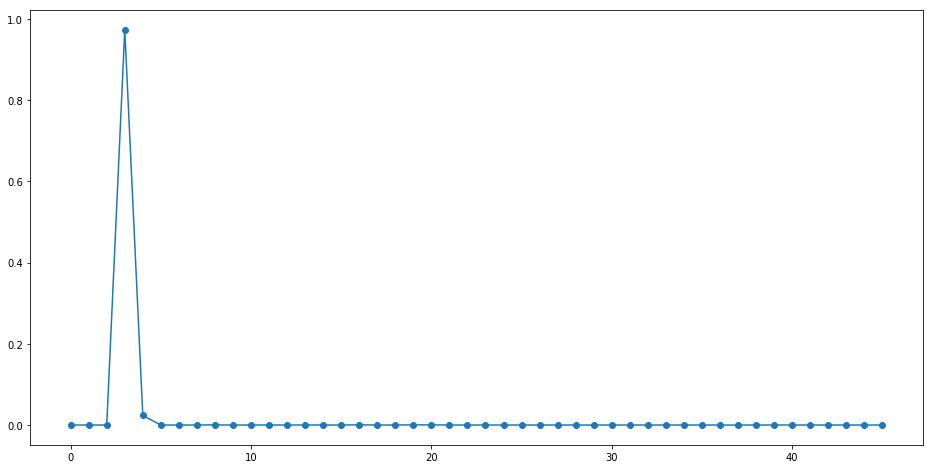

In [48]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np.arange(predictions[0].shape[0]), predictions[0], marker='o')

In [41]:
predictions[0].shape

(46,)

In [52]:
# To treat the labels as integer tensors

y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [55]:
# Model with an information bottleneck

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val));

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s - loss: 2.5642 - acc: 0.4526 - val_loss: 1.8090 - val_acc: 0.5480
Epoch 2/20
7982/7982 [==============================] - 1s - loss: 1.5605 - acc: 0.5727 - val_loss: 1.5177 - val_acc: 0.6000
Epoch 3/20
7982/7982 [==============================] - 1s - loss: 1.2693 - acc: 0.6688 - val_loss: 1.3947 - val_acc: 0.6630
Epoch 4/20
7982/7982 [==============================] - 1s - loss: 1.0929 - acc: 0.7331 - val_loss: 1.3369 - val_acc: 0.6850
Epoch 5/20
7982/7982 [==============================] - 1s - loss: 0.9719 - acc: 0.7523 - val_loss: 1.3551 - val_acc: 0.6910
Epoch 6/20
7982/7982 [==============================] - 1s - loss: 0.8834 - acc: 0.7636 - val_loss: 1.3293 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 1s - loss: 0.8107 - acc: 0.7783 - val_loss: 1.3544 - val_acc: 0.7020
Epoch 8/20
7982/7982 [==============================] - 1s - loss: 0.7470 - a